# Installation

In [ ]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret

In [ ]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [3]:
from pycaret.utils import version
version()

1.0.0


# 1. Importing Dataset

In [4]:
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. Setting up Environment

In [6]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=786)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Target Type,Binary
2,Label Encoded,"CH: 0, MM: 1"
3,Original Data,"(1070, 19)"
4,Missing Values,False
5,Numeric Features,13
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 3. Compare Models

In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.830200,0.899500,0.740200,0.812000,0.771300,0.637200
1,Linear Discriminant Analysis,0.822200,0.898900,0.750500,0.790100,0.766400,0.623500
2,Ridge Classifier,0.820800,0.000000,0.746900,0.789000,0.762900,0.619700
3,CatBoost Classifier,0.802200,0.887600,0.757200,0.751800,0.750100,0.587200
4,Gradient Boosting Classifier,0.795400,0.895000,0.743200,0.743700,0.738200,0.571200
5,Extreme Gradient Boosting,0.790100,0.891900,0.736400,0.736000,0.731700,0.560100
6,Quadratic Discriminant Analysis,0.784800,0.819000,0.784900,0.705000,0.739200,0.557600
7,Ada Boost Classifier,0.783400,0.876700,0.698400,0.735000,0.713400,0.540000
8,Light Gradient Boosting Machine,0.776700,0.870900,0.729500,0.713200,0.718100,0.534000
9,Extra Trees Classifier,0.775500,0.835600,0.709400,0.717400,0.711200,0.528100


# 4. Create Model

In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7933,0.8814,0.6102,0.8182,0.6990,0.5467
1,0.8667,0.9350,0.7966,0.8545,0.8246,0.7172
2,0.8267,0.8977,0.8276,0.7500,0.7869,0.6414
3,0.8121,0.8816,0.7069,0.7885,0.7455,0.5972
4,0.8054,0.8948,0.6897,0.7843,0.7339,0.5815
Mean,0.8208,0.8981,0.7262,0.7991,0.7580,0.6168
SD,0.0253,0.0196,0.0780,0.0352,0.0435,0.0587


In [10]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7467,0.7333,0.6667,0.6897,0.6780,0.4693
1,0.7867,0.7667,0.6667,0.7692,0.7143,0.5455
2,0.8000,0.8186,0.8276,0.7059,0.7619,0.5914
3,0.8267,0.8332,0.8621,0.7353,0.7937,0.6458
4,0.7067,0.7339,0.7931,0.5897,0.6765,0.4186
5,0.8000,0.8167,0.8276,0.7059,0.7619,0.5914
6,0.6133,0.6132,0.5517,0.5000,0.5246,0.2001
7,0.6933,0.6799,0.6207,0.6000,0.6102,0.3575
8,0.7703,0.7506,0.6207,0.7500,0.6792,0.5028
9,0.7568,0.7448,0.6897,0.6897,0.6897,0.4897


# 5. Tune Model

In [12]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8267,0.8715,0.6667,0.8696,0.7547,0.6243
1,0.8400,0.8959,0.7333,0.8462,0.7857,0.6591
2,0.8400,0.8962,0.7586,0.8148,0.7857,0.6583
3,0.8800,0.9344,0.9655,0.7778,0.8615,0.7578
4,0.7733,0.8598,0.7586,0.6875,0.7213,0.5311
5,0.8533,0.9123,0.8966,0.7647,0.8254,0.7003
6,0.6933,0.8133,0.6207,0.6000,0.6102,0.3575
7,0.7600,0.8175,0.6552,0.7037,0.6786,0.4875
8,0.7973,0.8636,0.6207,0.8182,0.7059,0.5556
9,0.7703,0.8011,0.7586,0.6875,0.7213,0.5267


In [13]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')

In [15]:
tuned_nb = tune_model('nb', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7600,0.8522,0.4000,1.0000,0.5714,0.4444
1,0.7067,0.7837,0.6000,0.6429,0.6207,0.3820
2,0.8000,0.9010,0.5862,0.8500,0.6939,0.5527
3,0.8267,0.9363,0.6552,0.8636,0.7451,0.6175
4,0.7467,0.7834,0.6207,0.6923,0.6545,0.4555
5,0.7867,0.8666,0.6552,0.7600,0.7037,0.5385
6,0.7867,0.8831,0.6552,0.7600,0.7037,0.5385
7,0.7333,0.8096,0.4828,0.7368,0.5833,0.3995
8,0.7568,0.8467,0.4483,0.8667,0.5909,0.4417
9,0.7973,0.8567,0.5862,0.8500,0.6939,0.5499


In [16]:
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=0.001)


# 6. Ensemble Model

In [18]:
bagged_dt = ensemble_model(dt, n_estimators=25)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8133,0.8826,0.7333,0.7857,0.7586,0.6067
1,0.7867,0.8907,0.6333,0.7917,0.7037,0.5402
2,0.8267,0.9104,0.7241,0.8077,0.7636,0.6274
3,0.8800,0.9337,0.8966,0.8125,0.8525,0.7517
4,0.7333,0.8010,0.7931,0.6216,0.6970,0.4650
5,0.8267,0.8876,0.8966,0.7222,0.8000,0.6502
6,0.7200,0.7826,0.6897,0.6250,0.6557,0.4207
7,0.6933,0.8043,0.6207,0.6000,0.6102,0.3575
8,0.8243,0.9046,0.7241,0.8077,0.7636,0.6245
9,0.7432,0.8448,0.6552,0.6786,0.6667,0.4580


In [19]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7867,0.8648,0.7000,0.7500,0.7241,0.5506
1,0.7867,0.8474,0.7000,0.7500,0.7241,0.5506
2,0.8000,0.8486,0.8276,0.7059,0.7619,0.5914
3,0.8933,0.9374,0.9310,0.8182,0.8710,0.7807
4,0.7067,0.7950,0.7931,0.5897,0.6765,0.4186
5,0.8000,0.8426,0.7586,0.7333,0.7458,0.5810
6,0.6533,0.7106,0.6207,0.5455,0.5806,0.2873
7,0.6933,0.7646,0.6207,0.6000,0.6102,0.3575
8,0.8378,0.9184,0.7241,0.8400,0.7778,0.6512
9,0.7297,0.7705,0.6207,0.6667,0.6429,0.4259


# 7. Blend Models

In [20]:
lr = create_model('lr', verbose=False)
lda = create_model('lda', verbose=False)
gbc = create_model('gbc', verbose=False)

In [21]:
blender = blend_models(estimator_list=[lr,lda,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8267,0.9122,0.6333,0.9048,0.7451,0.6199
1,0.8000,0.9067,0.7000,0.7778,0.7368,0.5763
2,0.8533,0.9295,0.7586,0.8462,0.8000,0.6848
3,0.8933,0.9633,0.8966,0.8387,0.8667,0.7779
4,0.7600,0.8643,0.7586,0.6667,0.7097,0.5066
5,0.8800,0.9190,0.9310,0.7941,0.8571,0.7548
6,0.7600,0.8973,0.7586,0.6667,0.7097,0.5066
7,0.7600,0.8381,0.6897,0.6897,0.6897,0.4940
8,0.8108,0.9126,0.6552,0.8261,0.7308,0.5879
9,0.8243,0.8912,0.7586,0.7857,0.7719,0.6291


In [22]:
blender.estimators_

[LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=786, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_

# 8. Analyze Model

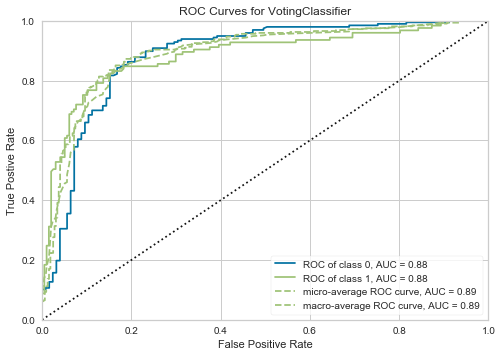

In [23]:
plot_model(blender)

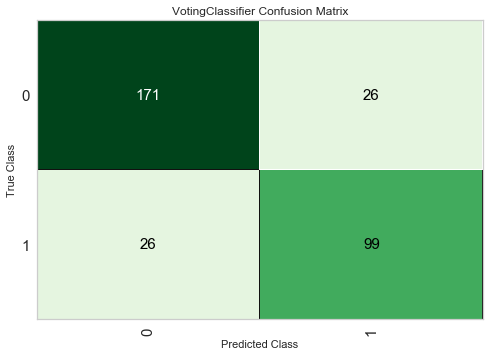

In [24]:
plot_model(blender, plot = 'confusion_matrix')

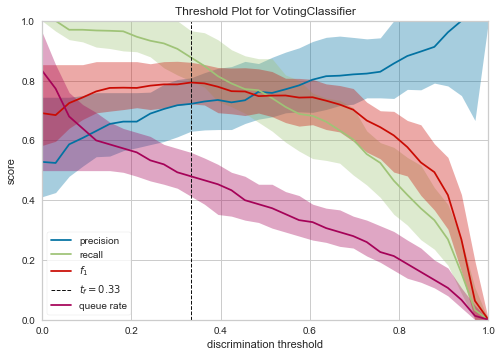

In [25]:
plot_model(blender, plot = 'threshold')

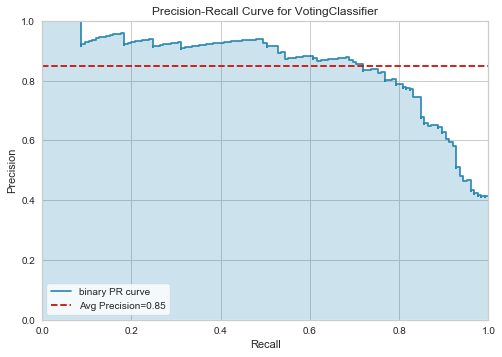

In [26]:
plot_model(blender, plot = 'pr')

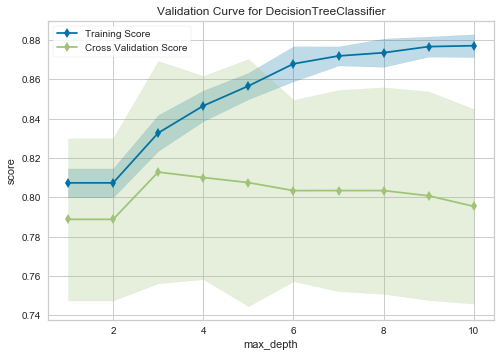

In [27]:
plot_model(tuned_dt, plot = 'vc')

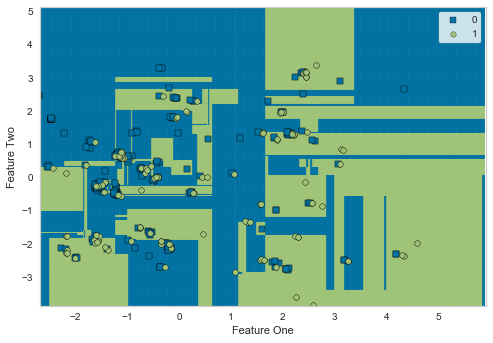

In [28]:
plot_model(dt, plot = 'boundary')

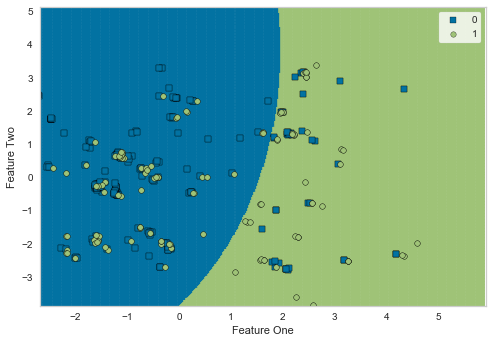

In [29]:
plot_model(tuned_nb, plot = 'boundary')

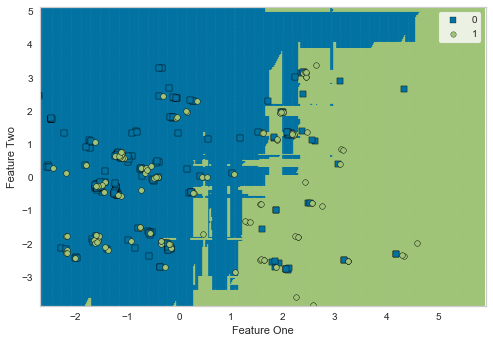

In [30]:
plot_model(blender, plot = 'boundary')

In [32]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 9. Interpret Model

In [33]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8133,0.9130,0.6667,0.8333,0.7407,0.5977
1,0.8267,0.9067,0.7667,0.7931,0.7797,0.6369
2,0.8400,0.9250,0.7241,0.8400,0.7778,0.6538
3,0.8800,0.9633,0.9310,0.7941,0.8571,0.7548
4,0.7200,0.8328,0.7241,0.6176,0.6667,0.4279
5,0.8267,0.9295,0.8621,0.7353,0.7937,0.6458
6,0.7333,0.8471,0.7241,0.6364,0.6774,0.4518
7,0.7067,0.8043,0.6552,0.6129,0.6333,0.3893
8,0.7703,0.9084,0.5862,0.7727,0.6667,0.4964
9,0.7838,0.8889,0.7241,0.7241,0.7241,0.5464


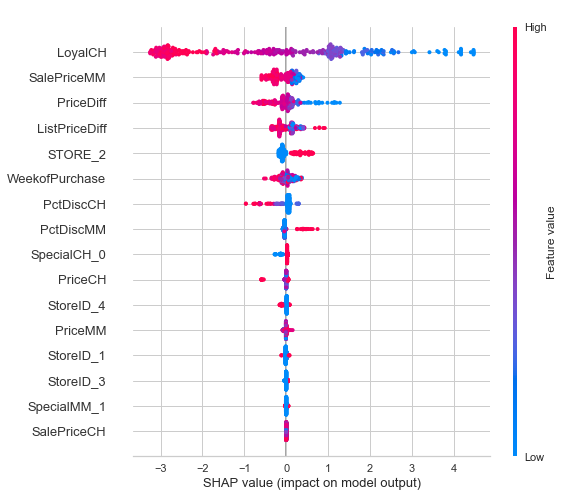

In [34]:
interpret_model(xgboost)

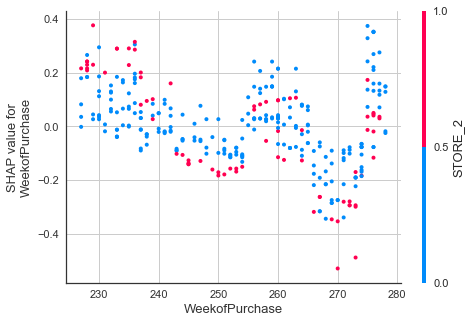

In [35]:
interpret_model(xgboost, plot = 'correlation')

In [36]:
interpret_model(xgboost, plot = 'reason', observation=1)

In [37]:
interpret_model(xgboost, plot = 'reason')

# 10. Deploy Model

In [38]:
deploy_model(xgboost, model_name = 'xgboost-for-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


In [40]:
save_model(xgboost, 'abc')

Transformation Pipeline and Model Succesfully Saved


In [41]:
l = load_model('abc')

Transformation Pipeline and Model Sucessfully Loaded


In [44]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8400,0.9041,0.6667,0.9091,0.7692,0.6512
1,0.7867,0.8852,0.6667,0.7692,0.7143,0.5455
2,0.8533,0.9160,0.7586,0.8462,0.8000,0.6848
3,0.8800,0.9453,0.8276,0.8571,0.8421,0.7454
4,0.7867,0.8681,0.7241,0.7241,0.7241,0.5502
5,0.8800,0.9145,0.9310,0.7941,0.8571,0.7548
6,0.8533,0.9160,0.7586,0.8462,0.8000,0.6848
7,0.7867,0.8433,0.6897,0.7407,0.7143,0.5444
8,0.7973,0.9027,0.6207,0.8182,0.7059,0.5556
9,0.8378,0.8996,0.7586,0.8148,0.7857,0.6555


In [46]:
predict_model(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Learning Resources:

- PyCaret Classification Module : https://www.pycaret.org/classification
- Binary Classification Tutorial (Level Beginner) : https://pycaret.org/clf101/
- Binary Classification Tutorial (Level Intermediate) : https://pycaret.org/clf102/
- Kaggle Titanic Predictions (Video Tutorial) : https://www.youtube.com/watch?v=nqMM6rngNCA